<a href="https://colab.research.google.com/github/Aleehaa/Machine_Learning/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
# Calculate the mean of a specific column
#       Task 1
data['length'].mean()


174.04926829268288

In [ ]:
# Calculate the mean of a specific column
#        Task 1
data['width'].median()

65.5

In [ ]:
#        Task 2
# Find duplicates
duplicates = data[data.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]


In [ ]:
#        Task 2
# Drop duplicates
data.drop_duplicates(inplace=True)


In [ ]:
#        Task 3
# Replace '?' with NaN values
data.replace('?', np.nan, inplace=True)



In [ ]:
#        Task 3
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print(missing_values)


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [ ]:
#            Task 4
#step 1: Convert 'normalized-losses' to numeric, forcing errors to NaN
data['normalized-losses'] = pd.to_numeric(data['normalized-losses'], errors='coerce')

#step 2: Calculate the mean of the column, excluding NaN values
mean_value = data['normalized-losses'].mean()
print(mean_value)

#step 3: Replace missing values with the mean
data['normalized-losses'].fillna(mean_value, inplace=True)
print(data['normalized-losses'])

122.0
0      122.0
1      122.0
2      122.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64


In [ ]:
#        Task 5
data_cleaned = data.dropna(subset=['price'])

<Axes: xlabel='symboling', ylabel='normalized-losses'>

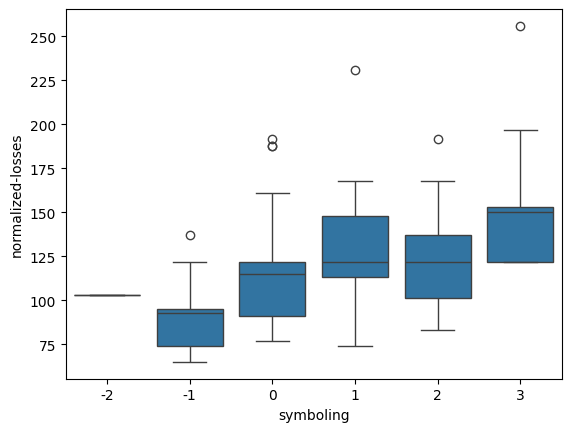

In [ ]:
#        Task 6
#  outliers in the data by plotting (normalized-losses and symboling)
sns.boxplot(x='symboling', y='normalized-losses',data=data)

<Axes: xlabel='symboling', ylabel='normalized-losses'>

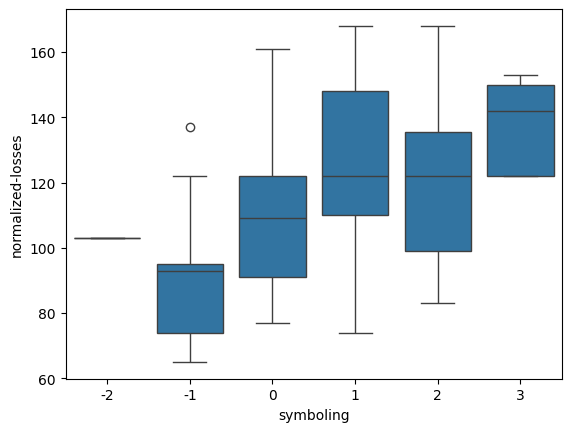

In [ ]:
#    Task 6
# Drop the outliers
data_cleaned= data_cleaned[data_cleaned['normalized-losses']<175]
sns.boxplot(x='symboling', y='normalized-losses',data=data_cleaned)